## Import Library

In [60]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import hstack
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import math

## Data Loading

In [61]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('spotify_songs.csv')
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


## Exploratory Data Analysis

In [62]:
# Mengetahui Jumlah Data dan Jumlah Fitur
df.shape

(32833, 23)

In [63]:
# Mengetahui Nama Kolom
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [64]:
# Mengetahui Fitur Apa Saja yang Ada dan Tipe Data yang Digunakan 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [65]:
# Mendeteksi Missing Value yang Lebih dari 0
df.isnull().sum()[df.isnull().sum() > 0]

track_name          5
track_artist        5
track_album_name    5
dtype: int64

In [66]:
# Mengetahui Karakteristik Data dan Distribusi Data Numerik
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


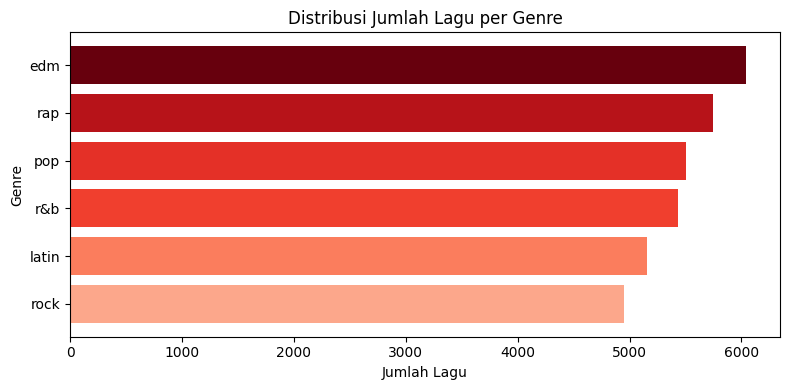

In [67]:
# Mengetahui Distribusi Jumlah Lagu per Genre
genre_counts = df["playlist_genre"].value_counts().sort_values()

values = genre_counts.values
norm = plt.Normalize(values.min() * 0.9, values.max())
colors = plt.cm.Reds(norm(values))

plt.figure(figsize=(8, 4))
plt.barh(genre_counts.index, values, color=colors)
plt.title("Distribusi Jumlah Lagu per Genre")
plt.xlabel("Jumlah Lagu")
plt.ylabel("Genre")

plt.tight_layout()
plt.show()

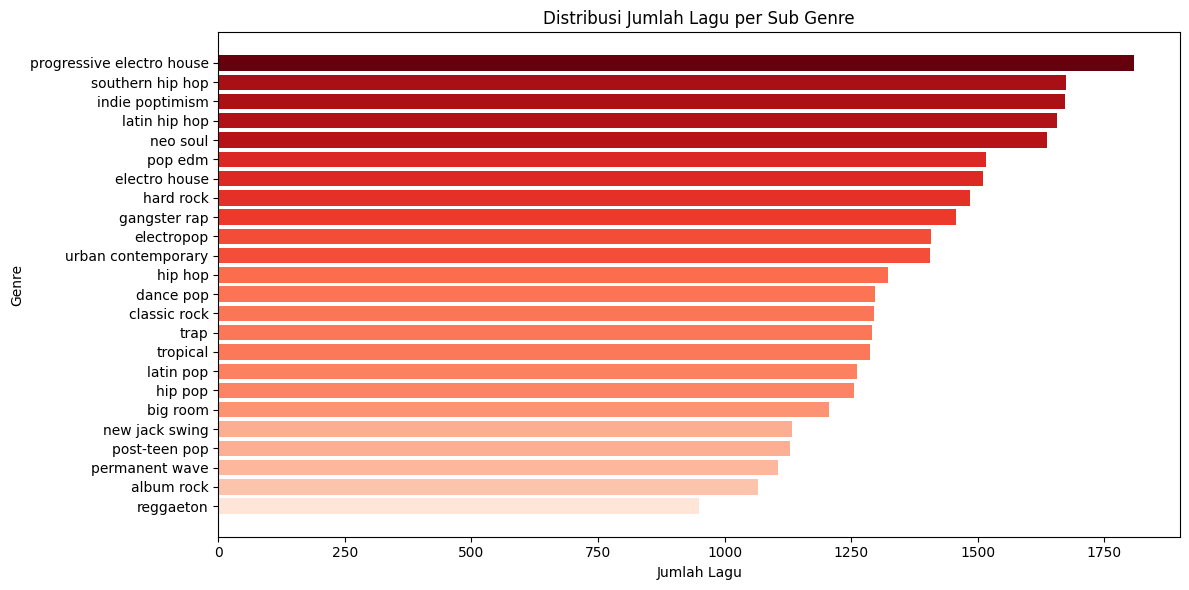

In [68]:
# Mengetahui Distribusi Jumlah Lagu per Sub Genre
genre_counts = df["playlist_subgenre"].value_counts().sort_values()

values = genre_counts.values
norm = plt.Normalize(values.min() * 0.9, values.max())
colors = plt.cm.Reds(norm(values))

plt.figure(figsize=(12, 6))
plt.barh(genre_counts.index, values, color=colors)
plt.title("Distribusi Jumlah Lagu per Sub Genre")
plt.xlabel("Jumlah Lagu")
plt.ylabel("Genre")

plt.tight_layout()
plt.show()

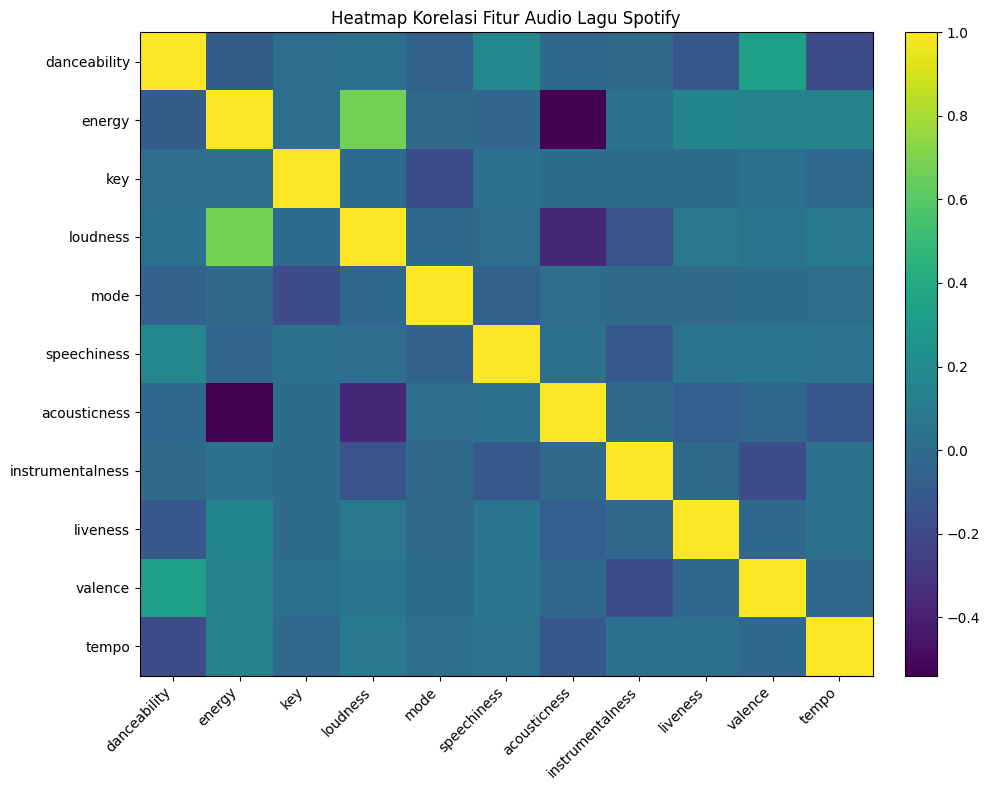

In [69]:
# Untuk Mengetahui Korelasi Antar Fitur dengan Correlation Matrix
audio_features = [
    "danceability", "energy", "key", "loudness", "mode",
    "speechiness", "acousticness", "instrumentalness",
    "liveness", "valence", "tempo"
]

corr_matrix = df[audio_features].corr()

plt.figure(figsize=(10, 8))
im = plt.imshow(corr_matrix, aspect="auto")

plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(audio_features)), audio_features, rotation=45, ha="right")
plt.yticks(range(len(audio_features)), audio_features)
plt.title("Heatmap Korelasi Fitur Audio Lagu Spotify")

plt.tight_layout()
plt.show()

## Data Preparation

In [70]:
# Fungsi Untuk Cleaning Data dan Memilih Fitur yang Relevan Dengan Use Case (Feature Selection)
def cleaning(df):
    df.dropna(inplace = True)
    df = df[['track_artist', 'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]

    return df

In [71]:
# Fungsi untuk Preprocessing Data
def preprocessing(df):

    # Splitting Berdasarkan Tipe Data
    df_num = df.select_dtypes(include = 'number')
    df_obj = df['track_artist'] + ' ' + df['playlist_genre'] + ' ' + df['playlist_subgenre']

    # Scaling dengan MinMax Scaler
    scaler = MinMaxScaler()
    arr_1 = scaler.fit_transform(df_num)

    df_num_scaled = pd.DataFrame(df_num, columns = df_num.columns) # Transformasi Array Menjadi Bentuk Dataframe
    df_num_scaled['content'] = df_obj # Membuat Kolom Baru Bernama content dan Menambahkan Data dari df_obj

    df_final = df_num_scaled # Dataframe Final Setelah Preprocessing

    return df_final, arr_1

In [72]:
# Ekstraksi Fitur teks dengan TF-IDF (Feature Extraction)
def vectorize(df):
    df_obj = df.content
    tfidf = TfidfVectorizer(max_features = 5000, stop_words = None)
    arr_2 = tfidf.fit_transform(df_obj)

    return arr_2

In [73]:
# Menjalankan Semua Fungsi
df_clean = cleaning(df)
df_preprocessing, arr_1 = preprocessing(df_clean)
vector = vectorize(df_preprocessing)

In [ ]:
# Display Hasil setelah Fungsi Dijalankan
display(df_clean.head())
display(df_preprocessing.head())
vector

,track_artist,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Ed Sheeran,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,Maroon 5,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,Zara Larsson,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,The Chainsmokers,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,Lewis Capaldi,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,content
0,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,Ed Sheeran pop dance pop
1,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,Maroon 5 pop dance pop
2,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,Zara Larsson pop dance pop
3,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,The Chainsmokers pop dance pop
4,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,Lewis Capaldi pop dance pop


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 131971 stored elements and shape (32828, 5000)>

## Modelling & Evaluation

In [ ]:
# Horizontal Stacking
X = hstack([vector, arr_1])
X = X.tocsr()

nn = NearestNeighbors(
    metric="cosine",
    algorithm="brute"
)
nn.fit(X)


,n_neighbors,5
,radius,1.0
,algorithm,'brute'
,leaf_size,30
,metric,'cosine'
,p,2
,metric_params,None
,n_jobs,None


In [ ]:
# Fungsi Rekomendasi Beserta Metrik Evaluasi
def recommendation(song_name, df, X, nn, top_k=5, cols=None, user_artist=None, sim_threshold=0.85, total_relevant=None):
    idx_query = df.index[df['track_name'] == song_name][0]
    query_vector = X[idx_query]
    
    if len(query_vector.shape) == 1:
        query_vector = query_vector.reshape(1, -1)
    
    distances, indices = nn.kneighbors(query_vector, n_neighbors=top_k+1)
    recommended_idx = indices[0][1:]
    
    rec_df = df.iloc[recommended_idx].copy()
    
    if user_artist is None:
        user_artist = df.loc[idx_query, "track_artist"]
    user_genre = df.loc[idx_query, "playlist_genre"]
    
    if "similarity" not in rec_df.columns:
        rec_df["similarity"] = 1 - distances[0][1:]
    
    # Fungsi Graded Relevance
    def relevance_score(row):
        if row["playlist_genre"] == user_genre and row["track_artist"] == user_artist:
            return 2
        elif row["playlist_genre"] == user_genre or row["similarity"] >= sim_threshold:
            return 1
        else:
            return 0
    
    rec_df["graded_rel"] = rec_df.apply(relevance_score, axis=1)
    
    # Precision@K
    precision = sum(rec_df["graded_rel"] > 0) / top_k
    
    # Recall@K
    if total_relevant is None:
        total_relevant = top_k 
    recall = sum(rec_df["graded_rel"] > 0) / total_relevant
    
    # NDCG@K
    def ndcg(scores):
        dcg = sum([(2**rel - 1)/math.log2(idx + 2) for idx, rel in enumerate(scores)])
        ideal = sorted(scores, reverse=True)
        idcg = sum([(2**rel - 1)/math.log2(idx + 2) for idx, rel in enumerate(ideal)])
        return dcg / idcg if idcg > 0 else 0
    
    ndcg_score = ndcg(rec_df["graded_rel"].tolist())
    
    if cols:
        rec_df = rec_df[cols + ["graded_rel", "similarity"]]
    
    metrics = {
        "Precision@K": precision,
        "Recall@K": recall,
        "NDCG@K": ndcg_score
    }
    
    return rec_df, metrics


In [ ]:
# Menjalankan Fungsi Rekomendasi dan Melihat Metrik Evaluasi
rekomendasi, metrik = recommendation(
    song_name="Animal",
    df=df,
    X=X,
    nn=nn,
    top_k=5,
    cols=["track_name", "track_artist", "playlist_genre"]
)

print(rekomendasi)
print(metrik)


            track_name track_artist playlist_genre  graded_rel  similarity
1942   Everybody Talks   Neon Trees            pop           2    0.992260
14570           Animal   Neon Trees           rock           1    0.951401
20693  Everybody Talks   Neon Trees          latin           1    0.945087
1843         Telephone   Waterparks            pop           1    0.904439
1989    Waste My Youth      GALXARA            pop           1    0.896748
{'Precision@K': 1.0, 'Recall@K': 1.0, 'NDCG@K': 1.0}


In [79]:
# Fungsi untuk Rekomendasi Lagu Berdasarkan Index Popularity
def popularity_recommendation(df, top_k, cols=None):
    df_unique = (
        df.groupby(["track_name", "track_artist"], as_index=False)
          .agg({
              "track_popularity": "max",
              "playlist_genre": "first"
          })
    )

    result = df_unique.sort_values(
        by="track_popularity",
        ascending=False
    ).head(top_k)

    if cols is not None:
        result = result[cols]

    return result


In [ ]:
# Menjalankan Fungsi Rekomendasi untuk Popularity
popularity_recommendation(
    df,
    top_k=5,
    cols=[
        "track_name",
        "track_artist",
        "playlist_genre",
        "track_popularity"
    ]
)


,track_name,track_artist,playlist_genre,track_popularity
4863,Dance Monkey,Tones and I,pop,100
17687,ROXANNE,Arizona Zervas,pop,99
3973,Circles,Post Malone,pop,98
23236,Tusa,KAROL G,pop,98
14033,Memories,Maroon 5,pop,98
